In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
size = 1000 # size
timeframe = 100 # timeframe

# situation matrix
X = np.zeros(shape = (size,size,timeframe+1)) 

# initial state
X[int(size/2),int(size/2),0] = 1 

# get neighbours
def getNeighbours(i,j):
    """
    Returns indices of neighbours corresponding to the (i,j) th cell
    """
    neighbours = []
    for x2 in range(i-1,i+2):
        for y2 in range(j-1, j+2):
            if ((x2!=i) | (y2!=j)):
                if (x2<size) & (x2>=0) & (y2<size) & (y2>=0):
                    neighbours.append((x2,y2))
    return neighbours

# get infected
def getInfected(X,t):
    """
    Returns indices of infected cells of X at time t
    """
    infected_list = []
    for i1,j in enumerate(X[:,:,t]):
        for i2,k in enumerate(j):
            if k == 1:
                infected_list.append((i1,i2))
    return infected_list

# get dead
def getDead(X,t):
    """
    Returns the indices of dead cells at time t
    """
    dead_list = []
    for i1,j in enumerate(X[:,:,t]):
        for i2,k in enumerate(j):
            if k == 2:
                dead_list.append((i1,i2))
    return dead_list
    
# transmission issue
def transmitNeighbours(neighbours_list, transmission_probability):
    """
    Takes in an input list of indices of neighbours
    Outputs the list of indices of newly infected cells
    """
    neighbours_infected = []
    infection_bitmask = np.random.binomial(1, transmission_probability, len(neighbours_list))
    for xy,i in zip(neighbours_list, infection_bitmask):
        if i == 1:
            neighbours_infected.append(xy)
    return neighbours_infected

# termination 
def isDead(x,y,t,t0):
    """
    For a cell with indices x,y 
    Detects if the cell would be dead or not
    at time t
    """
    if t>=t0:
        if np.mean(X[x,y,t-t0:t])>=1:
            return True
    return False

# evolution
def evolve(X, transmission_probability, threshold, timeframe):
    """
    Simulates the situation matrix X for n_iter iterations
    """
    
    n_infected = [] # number of infected peoples' list
    n_dead = [] # number of dead peoples' list
    
    for t in range(timeframe):
        X[:,:,t+1] = X[:,:,t] # carry over the history
        infected_list = getInfected(X,t)
        dead_list = getDead(X,t)
        n_infected.append(len(infected_list))
        n_dead.append(len(dead_list))
                
        for infected in infected_list:
            neighbours_list = getNeighbours(infected[0],infected[1])
            neighbours_infected = transmitNeighbours(neighbours_list, transmission_probability) # decaying transmission probability
            for neighbour in neighbours_infected:
                
                # infect if non-infected
                if (X[neighbour[0],neighbour[1],t] != 1):
                    X[neighbour[0],neighbour[1],t+1] = 1
        
        # dead if infected for a long time 
        if (t>5):
            for i1,j in enumerate(X[:,:,t]):
                for i2,k in enumerate(j):
                    if isDead(i1,i2,t,t0 = threshold):
                        X[i1,i2,t+1] = 2
    
    
    return {'end_state':X[:,:,:],
           'n_infected':n_infected,
           'n_dead':n_dead}

# # transition
# def transition(X):
    

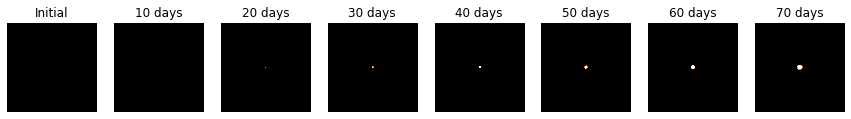

In [25]:
model = evolve(X,transmission_probability = 0.1, threshold = 7, timeframe = 90)

# plot
plt.figure(figsize = (15,15))
plt.subplot(181)
plt.axis('off')
plt.imshow(X[:,:,0], cmap = 'afmhot')
plt.title('Initial')

plt.subplot(182)
plt.imshow(model['end_state'][:,:,10], cmap = 'afmhot')
plt.title('10 days')
plt.axis('off')

plt.subplot(183)
plt.imshow(model['end_state'][:,:,20], cmap = 'afmhot')
plt.title('20 days')
plt.axis('off')

plt.subplot(184)
plt.imshow(model['end_state'][:,:,30], cmap = 'afmhot')
plt.title('30 days')
plt.axis('off')

plt.subplot(185)
plt.imshow(model['end_state'][:,:,40], cmap = 'afmhot')
plt.title('40 days')
plt.axis('off')

plt.subplot(186)
plt.imshow(model['end_state'][:,:,50], cmap = 'afmhot')
plt.title('50 days')
plt.axis('off')

plt.subplot(187)
plt.imshow(model['end_state'][:,:,60], cmap = 'afmhot')
plt.title('60 days')
plt.axis('off')

plt.subplot(188)
plt.imshow(model['end_state'][:,:,70], cmap = 'afmhot')
plt.title('70 days')
plt.axis('off')

plt.show()

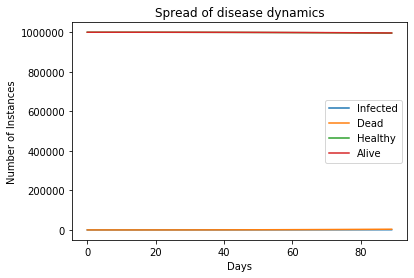

In [26]:
initial_pop = size * size
infected = model['n_infected']
dead = model['n_dead']
unaffected = np.array(initial_pop) - infected - dead
alive_pop = np.array(initial_pop) - dead

plt.plot(infected, label = 'Infected')
plt.plot(dead, label = 'Dead')
plt.plot(unaffected, label = 'Healthy')
plt.plot(alive_pop, label = 'Alive')
plt.ylabel('Number of Instances')
plt.xlabel('Days')
plt.title('Spread of disease dynamics')
plt.legend()
plt.show()

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


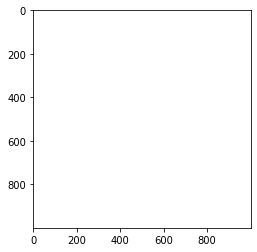

In [27]:
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for t in range(X.shape[2]):
    plt.imshow(X[:,:,t], cmap = 'afmhot')
    camera.snap()
animation = camera.animate()
animation.save('noob_dynamics_large.gif')